In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("BTC.csv")
df

,Date,open,high,low,close,volume
0,4/13/2020,6903.79,6903.79,6575.00,6837.91,96415.47657
1,4/14/2020,6838.04,6978.00,6754.28,6868.70,69068.62329
2,4/15/2020,6868.57,6933.00,6605.00,6621.24,61571.38499
3,4/16/2020,6621.25,7190.00,6468.27,7101.94,125009.85750
4,4/17/2020,7101.99,7148.12,6972.98,7027.55,54126.50976
...,...,...,...,...,...,...
495,8/21/2021,49322.47,49757.04,48222.00,48821.87,46745.13658
496,8/22/2021,48821.88,49500.00,48050.00,49239.22,37007.88780
497,8/23/2021,49239.22,50500.00,49029.00,49488.85,52462.54195
498,8/24/2021,49488.85,49860.00,47600.00,47674.01,51014.59475


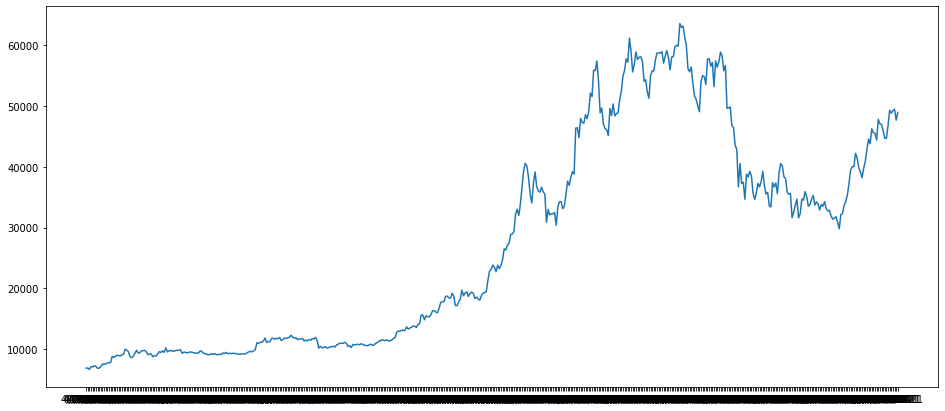

In [ ]:
df = df[["Date", "close"]]
plt.figure(figsize=(16,7))
plt.plot(df["Date"], df["close"])

In [ ]:
#Standardize our data
df["close"] = (df["close"] - df["close"].mean()) / df["close"].std()
df["close"]

0     -1.170361
1     -1.168613
2     -1.182665
3     -1.155368
4     -1.159593
         ...   
495    1.213733
496    1.237432
497    1.251608
498    1.148551
499    1.220156
Name: close, Length: 500, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val = train_test_split(df["close"], test_size=0.2, shuffle=False)
x_val, x_test = train_test_split(x_val, test_size=0.4, shuffle=False)

In [ ]:
x_train

0     -1.170361
1     -1.168613
2     -1.182665
3     -1.155368
4     -1.159593
         ...   
395    1.261950
396    1.271631
397    1.096818
398    1.077994
399    0.913686
Name: close, Length: 400, dtype: float64

In [ ]:
x_val

400    0.874603
401    0.524820
402    0.742681
403    0.556729
404    0.567956
405    0.409269
406    0.644422
407    0.617643
408    0.669727
409    0.629299
410    0.466523
411    0.406424
412    0.465261
413    0.556831
414    0.524990
415    0.574711
416    0.670004
417    0.532708
418    0.457989
419    0.474065
420    0.346665
421    0.336899
422    0.564454
423    0.524004
424    0.561270
425    0.459858
426    0.657158
427    0.742094
428    0.720955
429    0.619023
430    0.604483
431    0.475402
432    0.456315
433    0.462927
434    0.236282
435    0.287425
436    0.353779
437    0.409715
438    0.234892
439    0.274596
440    0.411830
441    0.400163
442    0.480620
443    0.431402
444    0.343934
445    0.359940
446    0.410058
447    0.445116
448    0.354465
449    0.384554
450    0.364231
451    0.308217
452    0.361601
453    0.343831
454    0.386767
455    0.320194
456    0.299929
457    0.305054
458    0.251675
459    0.223501
Name: close, dtype: float64

In [ ]:
x_test

460    0.231236
461    0.245914
462    0.192597
463    0.133012
464    0.266695
465    0.274834
466    0.351282
467    0.386719
468    0.450483
469    0.555910
470    0.681990
471    0.713886
472    0.713711
473    0.838066
474    0.795787
475    0.703999
476    0.664384
477    0.610961
478    0.697056
479    0.761751
480    0.873870
481    0.972431
482    0.928242
483    1.067880
484    1.029924
485    1.025722
486    0.962576
487    1.155705
488    1.114167
489    1.108790
490    1.047885
491    0.979439
492    0.979969
493    1.096683
494    1.242160
495    1.213733
496    1.237432
497    1.251608
498    1.148551
499    1.220156
Name: close, dtype: float64

In [ ]:
window_size = 15
batch_size =32
shuffle_buffer = x_train.shape[0]

In [ ]:
def window_ds(series, window_size, batch_size, shuffle_buffer):
    ds= tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size +1))
    ds = ds.shuffle(shuffle_buffer).map(lambda w: (w[:-1], w[-1]))
    ds= ds.batch(batch_size).prefetch(1)
    return ds

In [ ]:
x_train_ds = window_ds(x_train, window_size,batch_size, shuffle_buffer)
x_val_ds = window_ds(x_train, window_size,batch_size, x_val.shape[0])

In [ ]:
for i in x_train_ds:
    print(i)

(<tf.Tensor: shape=(32, 15), dtype=float64, numpy=
array([[-1.07248485, -1.05832985, -1.03001757, -1.00261215, -1.02961722,
        -1.02593466, -1.00896876, -1.00590857, -1.00354628, -1.01854342,
        -1.04368705, -1.03793181, -1.03741222, -1.06346613, -1.05324411],
       [-0.45551184, -0.34710257, -0.26410212, -0.24648545, -0.20592787,
        -0.22671659, -0.26850018, -0.20654229, -0.23936621, -0.21117545,
        -0.15533964, -0.0542086 , -0.06623187, -0.02093097, -0.00357778],
       [-0.93113809, -0.91736298, -0.91305862, -0.90401661, -0.91013187,
        -0.91028349, -0.90533006, -0.91588087, -0.91355947, -0.9054425 ,
        -0.89134087, -0.88233918, -0.83288042, -0.82222967, -0.82481059],
       [ 1.00440831,  1.25718308,  1.19208493,  1.3004732 ,  1.18830527,
         1.20974874,  1.21715872,  1.33581557,  1.41550995,  1.55800435,
         1.61292137,  1.72203933,  1.69072535,  1.91597602,  1.78990692],
       [-0.51297911, -0.51561568, -0.47064073, -0.4956776 , -0.584810

In [ ]:
input_layer = tf.keras.layers.Input(shape=[window_size])
l0 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
l1 = tf.keras.layers.Dense(256, activation="relu")(l0)
output_l = tf.keras.layers.Dense(1)(l1)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_l)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="RMSprop", 
             loss="mse",
             metrics="mse")

In [ ]:
model.fit(x_train_ds, validation_data=x_val_ds, epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 99ms/step - loss: 0.1381 - mse: 0.1381 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0479 - val_mse: 0.0479
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.1976 - val_mse: 0.1976
Epoch 4/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0416 - mse: 0.0416 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 5/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 6/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 7/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 8/100
13/13 [==============================] - 0s 21ms/step - loss: 0.

In [ ]:
x_test = x_test.to_numpy()

In [ ]:
forecast = []
buys = {}
sells = {}

for i in range(0, len(x_test) - window_size, window_size):
    f = model.predict(x_test[i:i+window_size][np.newaxis])[0][0]

    if f > x_test[window_size]:
        buys.update({i+window_size:x_test[i+window_size]})
    elif f < x_test[window_size]:
        sells.update({i+window_size:x_test[i+window_size]})

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(x_test, label="Bitcoin Price")
plt.plot(forecast, label="")
plt.plot(list(buys.keys()), list(buys.values()), "^", color="g", label="Buy")
plt.plot(list(sells.keys()), list(sells.values()), "v", color="r", label="Sell")
plt.legend()
plt.grid(True)

NameError: name 'plt' is not defined